In [1]:
import pandas as pd ## Pandas Library (will use to load data,create data frame...etc).
import numpy as np ## Numpy Library ( will use to convert data frame to array or creating array etc...).
import os ## For connecting to machine to get path for reading/writing files.
import matplotlib.image as mpimg ## To load image.
import matplotlib.pyplot as plt ## For Visualizaton.
from keras.preprocessing import image ## To load Image and convert it into array.
from tqdm import tqdm ## To print Progress bars.
from sklearn.model_selection import train_test_split ## To split train data into train and validation data.
from keras.utils import to_categorical ## One hot Encoding.
from keras.models import Sequential ## Sequential Model.
from keras.layers import Dense ## Fully connected layer(all inputs connected to all nodes).
from keras.layers import Dropout ## For Regularaization (drops couple of nodes based on integer passed to constructor).
from keras.layers import Flatten ## To convert array  into 1D(one dimesional).
from keras.layers import Conv2D ## Convolution two dimensional layer .
from keras.layers import MaxPool2D ## fecthing important features/ reducing dimensions.
from keras.optimizers import RMSprop # Optimizer.
from keras.preprocessing.image import ImageDataGenerator # Image Augmentation.
from keras.callbacks import ReduceLROnPlateau # Call backs/Early stopping.

In [2]:
## Set max how many rows and columns you want to display in jupyter notebook.
pd.options.display.max_columns = 200 
pd.get_option('display.max_rows') 
pd.set_option('display.max_rows',None)

In [3]:
## Images path.
image_path ='../input/hp-2020/jh_2020/images/'

In [4]:
train = pd.read_csv('../input/hp-2020/jh_2020/train.csv',header='infer',sep=',')
test = pd.read_csv('../input/hp-2020/jh_2020/test.csv',header='infer',sep=',')

In [5]:
## Print dimensions of train and test data.
print(train.shape)
print(test.shape)

(1646, 2)
(706, 1)


In [6]:
## Check first record from train data.
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [7]:
## Check last record from train data.
train.tail(1)

,image_names,emergency_or_not
1645,860.jpg,1


In [8]:
## Check first record from test data.
test.head(1)


,image_names
0,1960.jpg


In [9]:
test.tail(1)

,image_names
705,1014.jpg


In [10]:
## Get summary statistics of train data.
train.describe(include='all')

,image_names,emergency_or_not
count,1646,1646.000000
unique,1646,NaN
top,1116.jpg,NaN
freq,1,NaN
mean,NaN,0.413730
std,NaN,0.492651
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [11]:
## Get summary statistics of test data.
test.describe(include='all')

,image_names
count,706
unique,706
top,382.jpg
freq,1


In [12]:
## Method will read list of images in the given path and returns image list.
def get_images_list(path):
    image_list = [] ## Initialize empty list.
    for img in tqdm(os.listdir(path)): ## Get list of image names from the given path and process each image names.
        image_list.append(img) ## add image name to image list.
    return image_list

In [13]:
## Get image list for the the given path.
image_list = get_images_list(image_path)

100%|██████████| 2352/2352 [00:00<00:00, 1902237.37it/s]


In [14]:
## Print first image name from image_list.
image_list[0]

'1269.jpg'

In [15]:
## Plot sample images based on given image location.
def display_sample_images(path):
    plt.figure(figsize=(20,6)) ## Set Figure Size.
    for ind,image_name in tqdm(enumerate(os.listdir(path))): ## enumerate() function iterates list and return index,value.
        img = mpimg.imread(os.path.join(path,image_name)) ## imread() reads the image from the given path and image name.
        if ind<10: ## Based on this condition it prints only 10 images.
            plt.subplot(2,5,ind+1) ## Add a subplot to the current figure(2 rows,5 columns and current index).
            plt.imshow(img) ## Displays image.
            plt.axis('off') ## Axis values will off.
            plt.title(ind) ## Setting title name to image.

2352it [00:21, 108.75it/s]


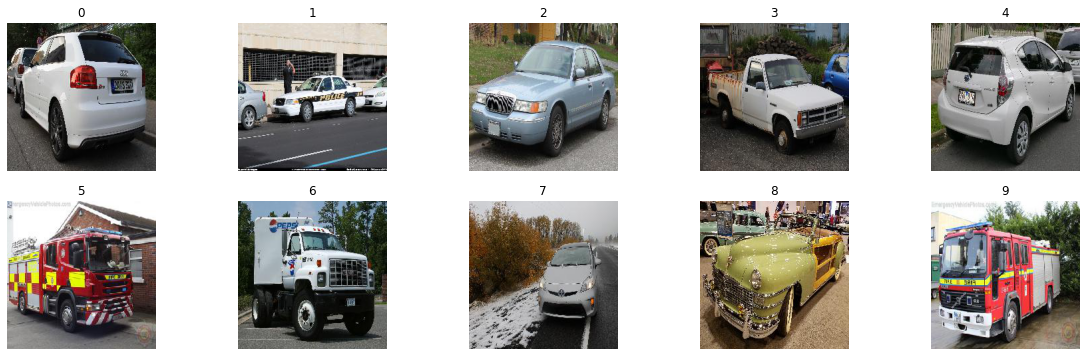

In [16]:
## Display first 10 images.
display_sample_images(image_path)

In [17]:
## Image Size
IMG_SIZE = 28

In [18]:
## Load training images from the given path based on image names which are there in train data and convert them into array.
def load_train_data(img_path):
    train_data = [] ## Initialize empty list
    for img in tqdm(train['image_names']): ## Get list of image names from train data and process each image name.
        if img in image_list: ## If the image name is present in image list then only we have to read image.
            path = os.path.join(img_path, img) ## Location of the the image.
            img = image.load_img(path,                              ## Load image from the given path and
                                 target_size=(IMG_SIZE,IMG_SIZE,3), ## Keep image size as 28X28X3(height,width,color channels) and
                                 grayscale=False)                   ## grayscale is false indicates that image is color image.
            img = image.img_to_array(img) ## Convert image pixels into an array.
            img = img/255 ## Normalize the train data (CNN converg faster on [0..1] data than on [0..255]).
            train_data.append(img) ## Add normalized image pixel array to train data.      
    return np.array(train_data) ## Convert list into an array and returns it.

In [19]:
## Get training data for the given image path.
train_data = load_train_data(image_path)

100%|██████████| 1646/1646 [00:03<00:00, 481.81it/s]


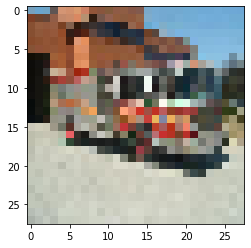

In [20]:
## Display sample train image.
plt.imshow(train_data[1491], cmap = 'gist_gray')

In [21]:
## Get size of the train_data.
len(train_data)

1646

In [22]:
## Check image size.
len(image_list)

2352

In [23]:
## Load testing images from the given path based on images names which are there in test data and convert them into array.
def load_test_data(image_path):
    test_data = []  ## Initialize empty list
    for img in tqdm(test['image_names']): ## Get list of image names from test data and process each image name.
        if img in image_list: ## If the image name is present in image list then only we have to read image.
            path = os.path.join(image_path, img) ## Location of the the image.
            img = image.load_img(path,                              ## Load image from the given path and
                                 target_size=(IMG_SIZE,IMG_SIZE,3), ## Keep image size as 28X28X3(height,width,color channels) and
                                 grayscale=False)                   ## grayscale is false indicates that image is color image.
            img = image.img_to_array(img) ## Convert image pixels into an array.
            img = img/255 ## Normalize the test data (CNN converg faster on [0..1] data than on [0..255]).
            test_data.append(img) ## Add normalized image pixel array to test data.
    return np.array(test_data) ## Convert list into an array and returns it.

In [24]:
## Get testing data for the given image path.
test_data = load_test_data(image_path)

100%|██████████| 706/706 [00:01<00:00, 505.99it/s]


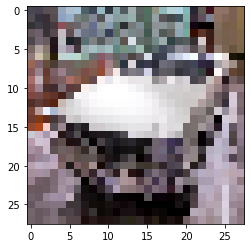

In [25]:
## Display sample test image.
plt.imshow(test_data[0], cmap = 'gist_gray')

In [26]:
## Do one hot encoding on target/label varible.
y = train['emergency_or_not'].values ## Fetch label/target values(0/1).
y = to_categorical(y) ## Converts a class vector (integers) to binary class matrix.

In [27]:
## Check sample value of target after doing one hot encoding.
y[0]

array([1., 0.], dtype=float32)

In [28]:
## Check sample record of target after doing one hot encoding.
y[5]

array([0., 1.], dtype=float32)

In [29]:
## Split the train data into train and validation data.
X_train, X_test, y_train, y_test = train_test_split(train_data,       ## Features(i/p).
                                                    y,                ## Traget(0/p).
                                                    random_state=474, ## It is the seed used by the random number generator.
                                                    test_size=0.2)    ## % of train and validation division.(80:20)

In [30]:
# Define the model structure.

## Instantiate Sequential model.
model = Sequential()

# Convolution layer with feature map size 3X3,32 filters,input shape 28X28X3,Relu Activation function.
model.add(Conv2D(32,  ##  Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size=(3, 3), ## An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.Can be a single integer to specify the same value for all spatial dimensions(Feature Map).
                 padding = 'Same', ## one of "valid" or "same" (padding is added to the frame of the image to allow for more space for the kernel to cover the image).
                 activation='relu', ## Activation function.If you don't specify anything, no activation is applied.
                 input_shape=(28,28,3))) ## Input shapes(28X28X3).

## Convolution layer with feature map size 3X3,64 filters,Relu Activation function.
model.add(Conv2D(64,
                 kernel_size=(3, 3), 
                 padding = 'Same',
                 activation='relu'))

## Maxpooling layer with kernal size 2X2,default stride (pool_size).
model.add(MaxPool2D(pool_size=(2, 2)))

## Droput 25% Nodes.
model.add(Dropout(0.25))

## Convert array data into one dimensional data.
model.add(Flatten())

## Fully connected layer with 128 output shape,Relu Activation function.
model.add(Dense(128, activation='relu'))

## Dropouts 50% Nodes.
model.add(Dropout(0.5))

## Fully connnected layer with 2 output shape,Softmax activation function.
model.add(Dense(2, activation='softmax'))

In [31]:
# Compile the model.
model.compile(loss='categorical_crossentropy',  ## String (name of objective function) or objective function or`Loss` instance.
              optimizer='Adam',                 ## String (name of optimizer) or optimizer instance.
              metrics=['accuracy'])             ## List of metrics to be evaluated by the model during training and testing.

In [32]:
# Fit the model.
model.fit(X_train,                            ## Input/Training data.
          y_train,                            ## Labels/Targe/Output data.
          epochs=30,                          ## Number of epochs to train the model.
          validation_data=(X_test, y_test))   ## On which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data(Validation  data). 

Epoch 1/30
42/42 [==============================] - 3s 80ms/step - loss: 0.7137 - accuracy: 0.5760 - val_loss: 0.6259 - val_accuracy: 0.6636
Epoch 2/30
42/42 [==============================] - 3s 75ms/step - loss: 0.5725 - accuracy: 0.7226 - val_loss: 0.5953 - val_accuracy: 0.7061
Epoch 3/30
42/42 [==============================] - 3s 76ms/step - loss: 0.4989 - accuracy: 0.7629 - val_loss: 0.5323 - val_accuracy: 0.7364
Epoch 4/30
42/42 [==============================] - 3s 76ms/step - loss: 0.4457 - accuracy: 0.8032 - val_loss: 0.5019 - val_accuracy: 0.7333
Epoch 5/30
42/42 [==============================] - 3s 75ms/step - loss: 0.4060 - accuracy: 0.8267 - val_loss: 0.5160 - val_accuracy: 0.7424
Epoch 6/30
42/42 [==============================] - 3s 76ms/step - loss: 0.3717 - accuracy: 0.8503 - val_loss: 0.5204 - val_accuracy: 0.7485
Epoch 7/30
42/42 [==============================] - 4s 86ms/step - loss: 0.3157 - accuracy: 0.8640 - val_loss: 0.5164 - val_accuracy: 0.7394
Epoch 8/30
42

In [33]:
## Get predictions for test data
prediction = model.predict_classes(test_data)

In [34]:
## Print first value from predictions
prediction[0]

0

In [35]:
## Copy test data into temp
temp = test.copy()

In [36]:
## Add predictions data to temp data frame with 'emergency_or_not' column name
temp ['emergency_or_not'] = prediction

In [37]:
## Check first 5 records from temp data
temp.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


In [38]:
## Copy 'image_names', 'emergency_or_not' columns data from temp to to_submit
to_submit = temp[['image_names', 'emergency_or_not']]

In [39]:
## Check the data value count for 'emergency_or_not' column
to_submit.emergency_or_not.value_counts()

0    417
1    289
Name: emergency_or_not, dtype: int64

In [40]:
## Store to_submit data into a csv file with name Keras_Predictions 
to_submit.to_csv('Keras_Predictions.csv',index = False)

In [41]:
## Set the CNN model.
## My CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out .

## Instantiate Sequential model.
model = Sequential()

## Convolution layer with feature map size 5X5,32 filters,input shape 28X28X1,Relu Activation function.
model.add(Conv2D(filters = 32, ## Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size = (5,5), ## An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.Can be a single integer to specify the same value for 1all spatial dimensions.
                 padding = 'Same', ## one of `"valid"` or `"same"`.
                 activation ='relu',## Activation function.If you don't specify anything, no activation is applied.
                 input_shape = (28,28,3))) ## input shapes(28X28X3).

## Convolution layer with feature map size 5X5,32 filters,Relu Activation function.
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))

## Maxpooling layer with kernal size 2X2,default stride (pool_size).
model.add(MaxPool2D(pool_size=(2,2)))

## Droput 25% Nodes.
model.add(Dropout(0.25))

## Convolution layer with feature map size 3X3,64 filters,Relu Activation function.
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))

## Convolution layer with feature map size 3X3,64 filters,Relu Activation function.
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))

## Maxpooling layer with kernal size 2X2,Stride 2X2.
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

## Droput 25% Nodes.
model.add(Dropout(0.25))

## Convert array data into one dimensional data.
model.add(Flatten())

## Fully connected layer with 256 output shape,Relu Activation function.
model.add(Dense(256, activation = "relu"))

## Dropouts 50% Nodes.
model.add(Dropout(0.5))

## Fully connnected layer with 2 output shape,Softmax activation function.
model.add(Dense(2, activation = "softmax"))

In [42]:
## Define the RMSprop optimizer with leaning rate 0.001.
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [43]:
## Compile the model
model.compile(optimizer = optimizer ,            ## String (name of optimizer) or optimizer instance.
              loss = "categorical_crossentropy", ## String (name of objective function) or objective function or`Loss` instance. 
              metrics=["accuracy"])              ## List of metrics to be evaluated by the model during training and testing.

In [44]:
## Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', ## Quantity to be monitored.
                                            patience=3,     ## Number of epochs that produced the monitored quantity with no improvement after which training will be stopped. 
                                            verbose=1,      ## int. 0: quiet, 1: update messages.
                                            factor=0.5,     ## Factor by which the learning rate will be reduced. new_lr = lr * factor
                                            min_lr=0.00001) ## Lower bound on the learning rate.

In [45]:
## Instantiate Data Augmentation

datagen = ImageDataGenerator(featurewise_center=False,            ## Set input mean to 0 over the dataset
                             samplewise_center=False,             ## Set each sample mean to 0
                             featurewise_std_normalization=False, ## Divide inputs by std of the dataset
                             samplewise_std_normalization=False,  ## Divide each input by its std
                             zca_whitening=False,                 ## Apply ZCA whitening
                             rotation_range=10,                   ## Randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.1,                    ## Randomly zoom image 
                             width_shift_range=0.1,               ## Randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,              ## Randomly shift images vertically (fraction of total height)
                             horizontal_flip=False,               ## Randomly flip images horizontally
                             vertical_flip=False)                 ## Randomly flip images vertically

## Fit data augmentation model
datagen.fit(X_train)

In [46]:
epochs = 30      ## Number of epochs to train a model
batch_size = 86  ## Number of sample to process at a time

In [47]:
## Fit the model
history = model.fit_generator(datagen.flow(X_train,                           ## Input data
                                           y_train,                           ## Labels/ Target/ out put data
                                           batch_size=batch_size),            ## Batch size (default: 32)
                              epochs = epochs,                                ## Number of epochs to train the model.
                              validation_data = (X_test, y_test),             ## On which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data(Validation data).
                              verbose = 2,                                    ## 0, 1, or 2. Verbosity mode 0 = silent, 1 = progress bar, 2 = one line per epoch.
                              steps_per_epoch=X_train.shape[0] // batch_size, ## Total number of steps (batches of samples) to yield from `generator` before declaring one epoch finished and starting the next epoch. It should typically be equal to `ceil(num_samples / batch_size)`
                              callbacks=[learning_rate_reduction])            ## List of callbacks to apply during training.

Epoch 1/30
15/15 - 6s - loss: 0.7399 - accuracy: 0.5395 - val_loss: 0.6836 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 2/30
15/15 - 5s - loss: 0.6742 - accuracy: 0.5919 - val_loss: 0.6464 - val_accuracy: 0.6424 - lr: 0.0010
Epoch 3/30
15/15 - 5s - loss: 0.6550 - accuracy: 0.6163 - val_loss: 0.6658 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 4/30
15/15 - 5s - loss: 0.6340 - accuracy: 0.6618 - val_loss: 0.6157 - val_accuracy: 0.6636 - lr: 0.0010
Epoch 5/30
15/15 - 5s - loss: 0.6333 - accuracy: 0.6732 - val_loss: 0.6154 - val_accuracy: 0.6697 - lr: 0.0010
Epoch 6/30
15/15 - 5s - loss: 0.5982 - accuracy: 0.6902 - val_loss: 0.5816 - val_accuracy: 0.7182 - lr: 0.0010
Epoch 7/30
15/15 - 6s - loss: 0.5649 - accuracy: 0.7146 - val_loss: 0.6018 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 8/30
15/15 - 5s - loss: 0.6421 - accuracy: 0.6634 - val_loss: 0.5755 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 9/30

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
15/15 - 5s - loss: 0

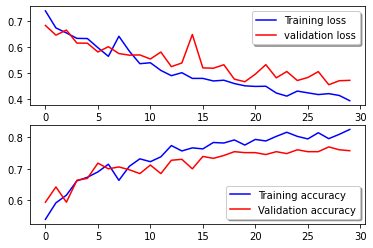

In [48]:
## Plot the loss and accuracy curves for training and validation data
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [49]:
## Get Predictions for test data
results = model.predict(test_data)

In [50]:
## Select the indix with the maximum probability
results = np.argmax(results,axis = 1)

In [51]:
## Copy test data into temp
temp = test.copy()

In [52]:
## Add predictions data to temp data frame with 'emergency_or_not' column name
temp ['emergency_or_not'] = results

In [53]:
## Copy 'image_names', 'emergency_or_not' columns data from temp to to_submit
to_submit = temp[['image_names', 'emergency_or_not']]

In [54]:
## Check the data value count for 'emergency_or_not' column
to_submit.emergency_or_not.value_counts()

0    364
1    342
Name: emergency_or_not, dtype: int64

In [55]:
## Store to_submit data into a csv file with name Keras_Predictions_With_DataAugmentation 
to_submit.to_csv('Keras_Predictions_With_DataAugmentation.csv',index = False)

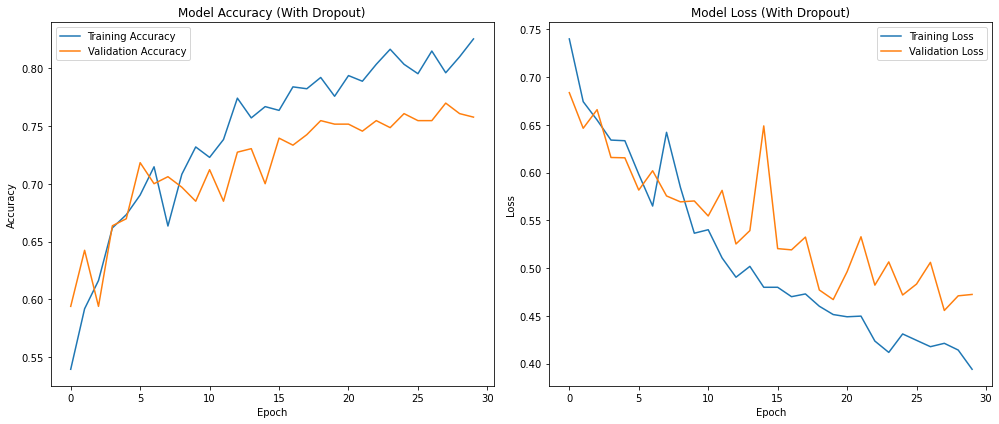

In [56]:
import matplotlib.pyplot as plt

# 建立圖表
plt.figure(figsize=(14, 6))

# 1. 準確率圖
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 2. 損失圖
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])


[0.539534866809845, 0.5918698906898499, 0.6162601709365845, 0.6617886424064636, 0.6731707453727722, 0.6902438998222351, 0.714634120464325, 0.6634146571159363, 0.7081300616264343, 0.7317829728126526, 0.722764253616333, 0.7382113933563232, 0.7739837169647217, 0.7569105625152588, 0.7666666507720947, 0.7634146213531494, 0.7837398648262024, 0.7821138501167297, 0.7918699383735657, 0.7756097316741943, 0.7934959530830383, 0.7886179089546204, 0.8032520413398743, 0.8162601590156555, 0.8032520413398743, 0.795121967792511, 0.8147286772727966, 0.7959349751472473, 0.8097561001777649, 0.8252032399177551]
[0.5939394235610962, 0.6424242258071899, 0.5939394235610962, 0.6636363863945007, 0.6696969866752625, 0.7181817889213562, 0.699999988079071, 0.7060605883598328, 0.6969696879386902, 0.6848484873771667, 0.7121211886405945, 0.6848484873771667, 0.7272727489471436, 0.7303030490875244, 0.699999988079071, 0.739393949508667, 0.7333333492279053, 0.7424242496490479, 0.7545454502105713, 0.7515151500701904, 0.751